In [1]:
from sqlite_helper import *
conn_1 = create_connection("main.db")
conn_2 = create_connection("temp.db")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sql_show_tables = """SELECT name FROM sqlite_master  
WHERE type='table'"""
res = execute_sql_statement(sql_show_tables,conn_1)
print(res)

[('airlines',), ('raw_data',), ('airports',), ('routes',), ('sqlite_sequence',), ('flights',)]


In [3]:
sql_stmt = """with da as (with delay_analysis as (with routes_modified as (SELECT r.RouteID as routeID, r.Source || '-' || r.Destination as route,
f.Distance as dist, f.DepDelayMinutes as delay FROM flights f 
inner join routes r on f.RouteID = r.RouteID order by delay desc)
SELECT
  routeID,
  route,
  dist,
  sum(delay) as sum_delay,
  COUNT(route) AS occurences

FROM
  routes_modified

GROUP BY 
  route

ORDER BY
  occurences DESC
  
Limit 20)

select * from delay_analysis
)
select routeID,
  route,
  dist,
  sum_delay/occurences as avg_delay,
  occurences
from da
order by occurences desc
"""
res = execute_sql_statement(sql_stmt, conn_1)
res = pd.DataFrame(res, columns=['RouteID', 'Route', 'Distance', 'Average Departure Delay', 'Frequency'])
res

,RouteID,Route,Distance,Average Departure Delay,Frequency
0,5250,LAX-SFO,337.0,11.043002,16162
1,207,SFO-LAX,337.0,10.120124,16150
2,200,LAX-LAS,236.0,12.289240,14628
3,4559,LAS-LAX,236.0,14.258029,14603
4,3231,HNL-OGG,100.0,5.770076,13922
5,2144,OGG-HNL,100.0,7.271525,13914
6,908,LGA-ORD,733.0,14.864825,13427
7,3847,ORD-LGA,733.0,14.984877,13423
8,2688,LAX-JFK,2475.0,15.422415,13134
9,4140,JFK-LAX,2475.0,15.264040,13123


In [4]:
res.sort_values('Average Departure Delay', ascending = False)

,RouteID,Route,Distance,Average Departure Delay,Frequency
12,2278,DEN-PHX,602.0,16.647870,11970
16,5232,MCO-ATL,404.0,16.089845,11876
8,2688,LAX-JFK,2475.0,15.422415,13134
9,4140,JFK-LAX,2475.0,15.264040,13123
17,2686,ATL-MCO,404.0,15.206599,11820
7,3847,ORD-LGA,733.0,14.984877,13423
6,908,LGA-ORD,733.0,14.864825,13427
13,3985,DCA-BOS,399.0,14.325812,11921
18,4578,ATL-FLL,581.0,14.269985,11471
3,4559,LAS-LAX,236.0,14.258029,14603


In [5]:
res.sort_values('Distance', ascending = False)

,RouteID,Route,Distance,Average Departure Delay,Frequency
8,2688,LAX-JFK,2475.0,15.422415,13134
9,4140,JFK-LAX,2475.0,15.264040,13123
6,908,LGA-ORD,733.0,14.864825,13427
7,3847,ORD-LGA,733.0,14.984877,13423
12,2278,DEN-PHX,602.0,16.647870,11970
15,3444,PHX-DEN,602.0,13.140900,11895
19,5119,FLL-ATL,581.0,14.254881,11421
18,4578,ATL-FLL,581.0,14.269985,11471
17,2686,ATL-MCO,404.0,15.206599,11820
16,5232,MCO-ATL,404.0,16.089845,11876


In [7]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RouteID                  20 non-null     int64  
 1   Route                    20 non-null     object 
 2   Distance                 20 non-null     float64
 3   Average Departure Delay  20 non-null     float64
 4   Frequency                20 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [8]:
res.describe()

,RouteID,Distance,Average Departure Delay,Frequency
count,20.000000,20.000000,20.000000,20.000000
mean,3117.400000,599.600000,12.620641,13048.500000
std,1724.375109,671.682914,3.323653,1467.383762
min,200.000000,100.000000,5.770076,11421.000000
25%,2123.250000,236.000000,10.812283,11913.750000
50%,3337.500000,401.500000,14.256455,12612.500000
75%,4563.750000,602.000000,15.040307,13916.000000
max,5315.000000,2475.000000,16.647870,16162.000000


In [9]:
res.corr()

,RouteID,Distance,Average Departure Delay,Frequency
RouteID,1.000000,0.068589,0.173817,-0.250975
Distance,0.068589,1.000000,0.490948,-0.072943
Average Departure Delay,0.173817,0.490948,1.000000,-0.304093
Frequency,-0.250975,-0.072943,-0.304093,1.000000


<AxesSubplot:>

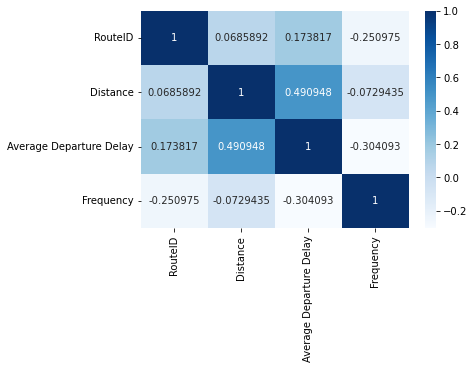

In [10]:
sns.heatmap(res.corr(), annot=True, fmt="g", cmap='Blues')

c:\Users\arnav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Departure Delay'>

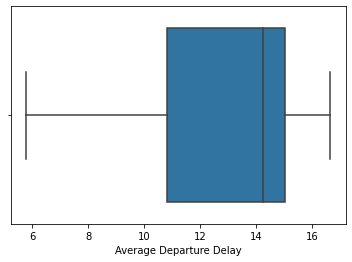

In [11]:
sns.boxplot(res['Average Departure Delay'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


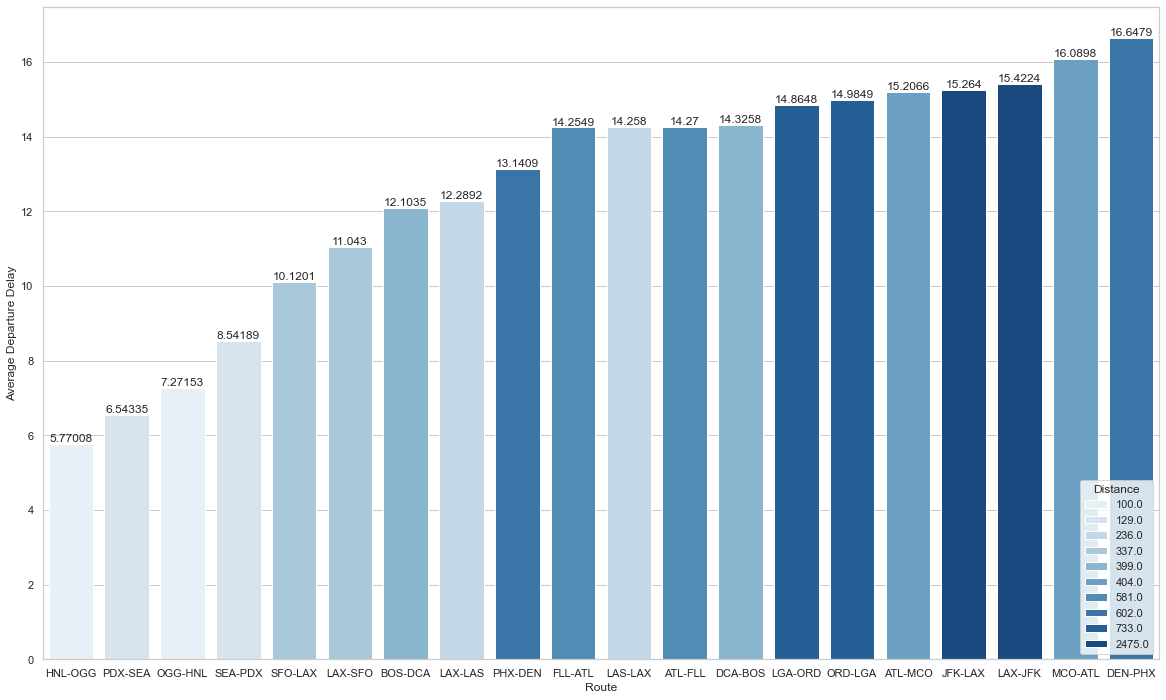

In [13]:
res.sort_values(by = 'Average Departure Delay', inplace=True)
plt.figure(figsize=(20,12))
plt.legend(loc='upper right')
sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(x = res['Route'], y = res['Average Departure Delay'], hue=res['Distance'], dodge = False, palette='Blues')
sns.move_legend(ax, "lower right")

for i in ax.containers:
    ax.bar_label(i,)

### Conclusion

We observe that there is a considerably high correlation between Average Departure Delay (in minutes) and Distance (in miles) with a pearson's correlation coefficient value of 0.49. The DEN-PHX route has the highest Average Departure Delay with 16.65 minutes and the HNL-OGG route has the lowest Average Departure Delay with 5.77 minutes. One of the outliers in this analysis is the PHX-DEN route which has a lower than expected Total Departure Delay even though the distance is quite high. Interestingly, the reverse route (DEN-PHX route) has a Average Departure Delay which is in accordance with what we expect. A possible reason for this could be that the departure delay is being caused because of the DEN airport being a lot busier than the PHX airport.

Another thing to point out is that the boxplot of the Average Departure Delay is left skewed indicating that bulk of the observations are quite large, with a few observations that are much smaller than the rest. This can be confirmed by looking at the bar plot above which indicates the same trend.